# Setup

In [40]:
import os
import glob

from pylibdmtx.pylibdmtx import decode
from ultralytics import YOLO, settings
root_dir = os.getcwd().replace('\\notebooks', '')
settings.update({'datasets_dir': f'{root_dir}/data/processed/test', 'runs_dir': f'{root_dir}/yolo/runs'})

# comment/uncomment to enable/disable printing
# print_amount = float('inf')
print_amount = 1

# Evaluation

In [29]:
def eval_yolo(model_path, glob_path, data_yaml, print_count=1):
    '''
    Given a yolo model, makes the following evaluations:
     - DM decode rate (% of decodings of test images)
     - Valid DM decode rate (% of decodings of test images that match with the serial number)
     - mAP scores for bounding boxes
    Also prints the first "print_count" images with predictions.
    '''

    # Load the model
    model = YOLO(model_path)

    # Run predictions on images
    files = glob.glob(glob_path)
    results = model(files)

    # prediction counts
    total_boxes = 0
    images_with_boxes = 0
    for result in results:
        if result.boxes:
            images_with_boxes += 1
            total_boxes += len(result.boxes)
    print(f'Found {images_with_boxes}/{len(files)} with predictions')
    print(f'Found {total_boxes} total boxes')

    # display results (if asked to)
    count = 0
    if print_count >= 1:
        for result in results:
            if result.boxes:
                print(result.show())
                count += 1
                if count >= print_count:
                    break

## Kaggle from Scratch


0: 640x640 6 Data Matrixs, 130.0ms
1: 640x640 (no detections), 130.0ms
2: 640x640 1 Data Matrix, 130.0ms
3: 640x640 1 Data Matrix, 130.0ms
4: 640x640 (no detections), 130.0ms
5: 640x640 1 Data Matrix, 130.0ms
6: 640x640 (no detections), 130.0ms
7: 640x640 1 Data Matrix, 130.0ms
8: 640x640 (no detections), 130.0ms
9: 640x640 1 Data Matrix, 130.0ms
10: 640x640 (no detections), 130.0ms
11: 640x640 (no detections), 130.0ms
12: 640x640 (no detections), 130.0ms
13: 640x640 2 Data Matrixs, 130.0ms
14: 640x640 1 Data Matrix, 130.0ms
15: 640x640 (no detections), 130.0ms
16: 640x640 1 Data Matrix, 130.0ms
17: 640x640 (no detections), 130.0ms
18: 640x640 (no detections), 130.0ms
19: 640x640 (no detections), 130.0ms
20: 640x640 (no detections), 130.0ms
21: 640x640 (no detections), 130.0ms
22: 640x640 3 Data Matrixs, 130.0ms
23: 640x640 (no detections), 130.0ms
24: 640x640 (no detections), 130.0ms
25: 640x640 (no detections), 130.0ms
26: 640x640 1 Data Matrix, 130.0ms
27: 640x640 4 Data Matrixs, 1

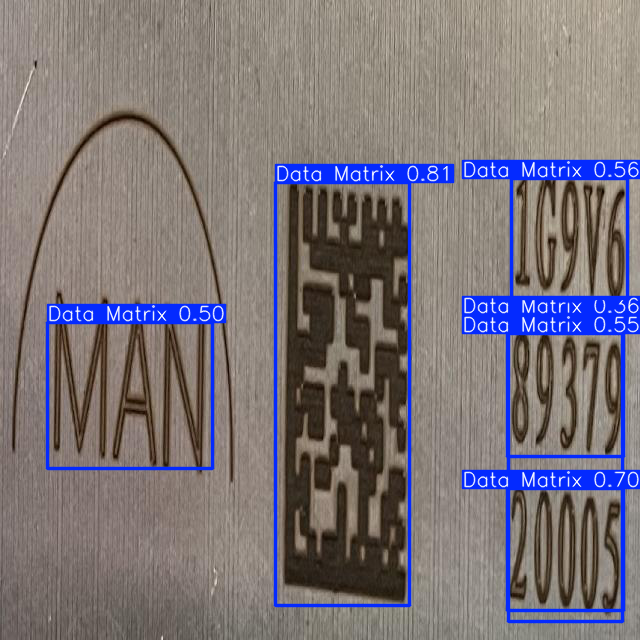

None


In [28]:
eval_yolo('../yolo/models/kaggle_scratch.pt', '../data/MAN/images/test/*.jpg', print_count=print_amount)

## Kaggle finetuned

In [ ]:
eval_yolo('../yolo/models/kaggle_finetuned.pt', '../data/MAN/images/test/*.jpg', print_count=print_amount)

## Ultralytics finetuned

In [ ]:
eval_yolo('../yolo/models/ultralytics_finetuned.pt', '../data/MAN/images/test/*.jpg', print_count=print_amount)